# Setup Tutorial for 3D Problems

In [16]:
from lsdo_genie import Genie3D

## Generate your point cloud
Begin by importing your point cloud $\mathcal{P}=\{(\mathbf{p}_i,\vec{\mathbf{n}}_i):i=1,\dots, N_\Gamma\}$.
Genie requires your points and normals to be in a numpy array of shape $(N_\Gamma,3)$.
In this example, we will consider the Stanford Bunny geometry.

In [17]:
from lsdo_genie.utils.geometric_shapes import geometry_path
from lsdo_genie.utils import extract_stl_data
surface_points,surface_normals = extract_stl_data(geometry_path+"Bunny.stl")

Number of triangles:  9000


## Define the domain of interest
Depending on your optimization problem, you will need to define a rectangular prism domain for the constraint function.
Using the minimum bounding box, let's grow it by 15 percent to ensure the constraint function can be evaluated outside of the geometric shape

In [18]:
from lsdo_genie.utils import enlarged_bbox
custom_domain = enlarged_bbox(surface_points,percent=15.)

## Initialize Genie instance
Next, we will initialize an instance of Genie.
We can use ```python verbose=True``` for Genie to print out steps as we go

In [19]:
genie = Genie3D(verbose=True)

## Input your data
We will now input the point cloud to be saved in the `genie` instance.

In [20]:
genie.input_point_cloud(
    surface_points=surface_points,
    surface_normals=surface_normals,
)

Minimum bbox: 
 [[-0.09077885  0.0624118 ]
 [ 0.0338952   0.18669383]
 [-0.06448359  0.06047339]]
Minimum bbox diagonal:  0.24985805
num_surface_points:  9000 



## Initialize the Bspline
Finally, we will define the Bspline for our non-interference constraint function.
The ```python genie.config()``` command will input the number of control points and the domain of the function and automtically
distribution the Bspline control points spatially throughout the domain
AND initialize their values $\mathbf{C}^\phi$ according to Hicken and Kaur's explicit formulation {cite:p}`Hicken_and_Kaur` 

In [21]:
genie.config(
    domain=custom_domain,
    max_control_points=26,
    min_ratio=0.75,
)

Bspline box: 
 [[-0.10226815  0.0739011 ]
 [ 0.0224353   0.19815373]
 [-0.07385536  0.06984517]]
Control point grid:  [26 25 21] = 13650
Number of quadrature points:  9614
Initial min distance:  -0.10967824413701671
Initial max distance:  0.03785961455910178
Bspline order:  4 



We can now visualize the initialized Bspline

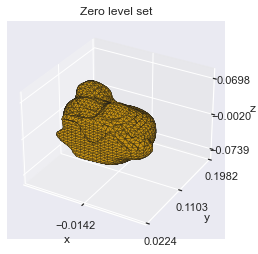

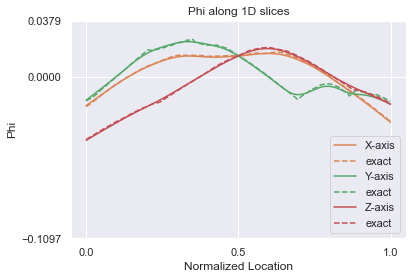

In [22]:
genie.visualize()